In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.manifold import trustworthiness
from sklearn.preprocessing import MinMaxScaler
import umap
from tqdm import tqdm
import os

In [12]:
df_path = os.path.join('..','..', 'src', 'graph_benchmark', 'user_embeddings.csv')
df = pd.read_csv(df_path)
user_ids = df['user_id']
df = df.drop(columns=['id', 'user_id'])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.014819,0.318998,-0.232075,-0.615343,-0.632123,-0.183650,-0.352888,0.179700,-0.725622,-0.419344,...,-0.094110,-0.547264,-0.069439,0.195289,-0.016826,-0.088550,-0.390154,0.293075,-0.236445,-0.041593
1,0.480526,-0.478583,-0.251820,-0.590413,-0.980972,-0.160369,-0.210526,-0.210529,-0.432922,-0.585469,...,-0.823631,0.412273,1.121179,0.914964,0.148406,0.198883,-0.253538,0.603116,-0.868820,-0.715891
2,-0.064912,-3.223288,-7.397039,-0.965528,-7.839769,1.247723,-6.321599,-7.773978,3.188324,-2.255675,...,7.947283,5.757581,-2.646831,-8.460135,-7.081692,-1.930002,-2.921444,1.235394,-7.006282,7.751076
3,0.462409,1.145017,0.264851,0.693812,0.557005,-0.761985,1.343561,-0.416964,-0.348923,0.105182,...,0.425445,0.183280,1.544957,-0.457620,-1.152213,1.256382,0.732002,-0.148850,0.893864,0.958752
4,-0.262272,-2.171113,-8.050799,-0.177136,-6.777208,1.352292,-6.296734,-7.686207,3.767580,-2.011669,...,9.208765,7.296651,-3.900183,-9.362906,-8.251870,-2.196878,-2.124597,0.880948,-6.419295,8.537656


In [13]:
scaler = MinMaxScaler()
features_to_scale = list(df.columns)
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.907854,0.425072,0.736971,0.876904,0.829482,0.072986,0.800048,0.911009,0.198437,0.220034,...,0.083826,0.075704,0.812322,0.878105,0.841206,0.239927,0.824614,0.153847,0.584405,0.180478
1,0.960608,0.340953,0.735311,0.879136,0.794646,0.074777,0.816382,0.874737,0.242739,0.206500,...,0.015692,0.178048,0.950734,0.936933,0.857064,0.261570,0.833775,0.187088,0.538077,0.121991
2,0.902519,0.051472,0.134510,0.845553,0.109742,0.183067,0.115220,0.171720,0.790829,0.070437,...,0.834861,0.748176,0.512692,0.170589,0.163142,0.101272,0.654863,0.254879,0.088449,0.856397
3,0.958679,0.512192,0.778755,0.994109,0.948225,0.028509,0.994692,0.855549,0.255452,0.262764,...,0.132351,0.153624,1.000000,0.824734,0.732235,0.341196,0.899867,0.106465,0.667211,0.267246
4,0.881501,0.162443,0.079540,0.916136,0.215847,0.191109,0.118072,0.179878,0.878502,0.090315,...,0.952679,0.912332,0.366986,0.096794,0.050832,0.081177,0.708301,0.216876,0.131452,0.924623


In [14]:
# Dimensionality reduction using UMAP
reducer = umap.UMAP(n_components=3, random_state=42)
embedding = reducer.fit_transform(df)
embedding_scaler = MinMaxScaler()
embedding = embedding_scaler.fit_transform(embedding)
embedding[5:]

/home/acaia/Analysa/Analysa/.analysa/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


array([[0.43570116, 0.7406056 , 0.7474958 ],
       [0.4670952 , 0.7651757 , 0.6548248 ],
       [0.45773008, 0.8035545 , 0.59872514],
       ...,
       [0.3446426 , 0.3080871 , 0.05826604],
       [0.994468  , 0.23018898, 0.9941267 ],
       [0.33746737, 0.31332433, 0.06926665]], dtype=float32)

In [15]:
# Measuring the trustworthiness of the reduction
trustworthiness = trustworthiness(df, embedding, n_neighbors=6)
print(f"Trustworthiness: {trustworthiness}")

Trustworthiness: 0.9857966064860091


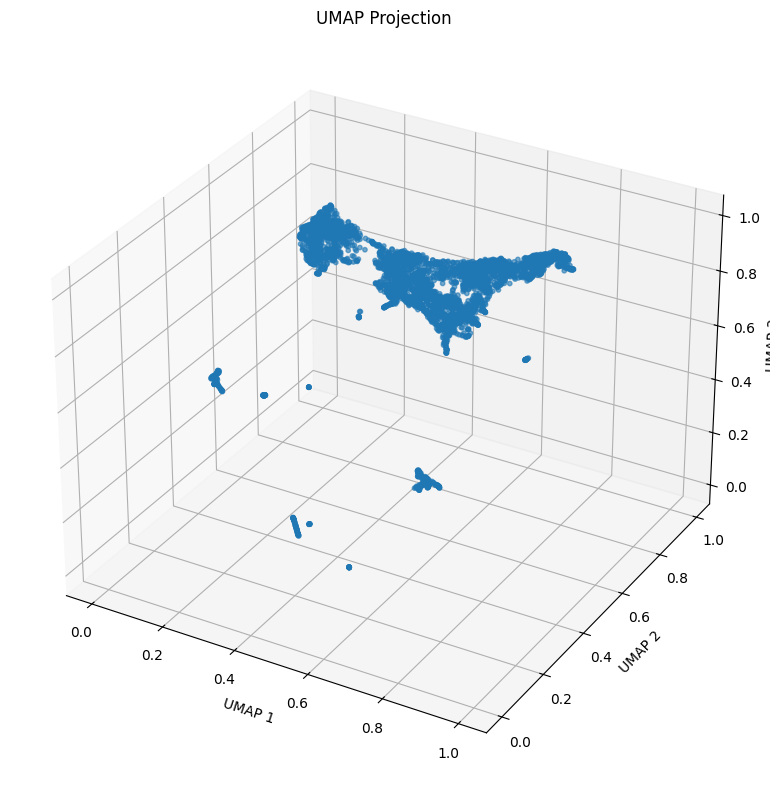

In [16]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    embedding[:,0],
    embedding[:,1],
    embedding[:,2],
    alpha=0.6,
    s=10
)

ax.set_title('UMAP Projection')
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_zlabel('UMAP 3')

plt.tight_layout()
plt.show()

  0%|          | 0/20 [00:00<?, ?it/s]/home/acaia/Analysa/Analysa/.analysa/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
  5%|▌         | 1/20 [00:06<01:59,  6.28s/it]/home/acaia/Analysa/Analysa/.analysa/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
 10%|█         | 2/20 [00:08<01:08,  3.78s/it]/home/acaia/Analysa/Analysa/.analysa/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
 15%|█▌        | 3/20 [00:10<00:52,  3.07s/it]/home/acaia/Analysa/Analysa/.analysa/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may

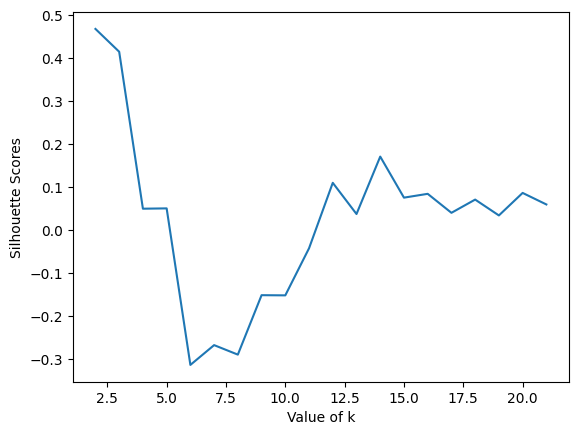

In [18]:
# Calculating the elbow point
k_rng = range(2,22) # Silhoutte socres requires a minimum of 2 cluster
silhouette_scores = []

for k in tqdm(k_rng):
    model = SpectralClustering(n_clusters=k, affinity='nearest_neighbors',n_neighbors=6, random_state=42)
    labels = model.fit_predict(embedding)
    score = silhouette_score(embedding, labels)
    silhouette_scores.append(score)

plt.xlabel('Value of k')
plt.ylabel('Silhouette Scores')
plt.plot(k_rng, silhouette_scores)

In [23]:
spectral = SpectralClustering(
    n_clusters=16,
    affinity='nearest_neighbors',
    n_neighbors=6,
    random_state=42
)

predictions = spectral.fit_predict(embedding)

/home/acaia/Analysa/Analysa/.analysa/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


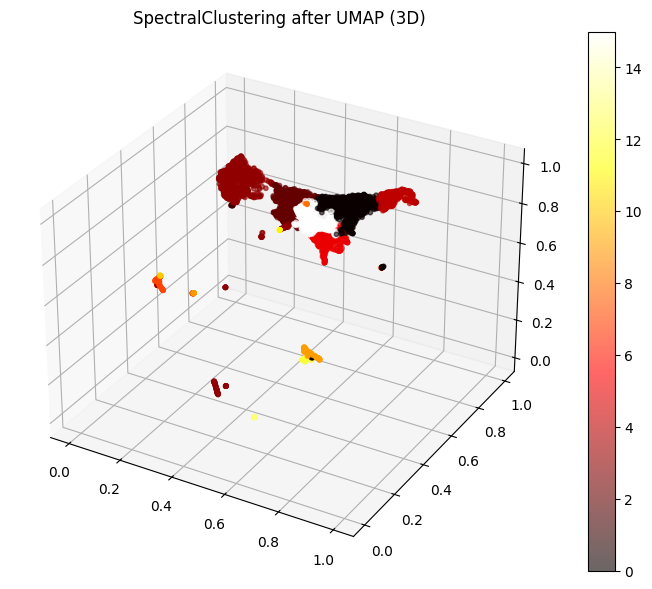

In [22]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    embedding[:, 0], embedding[:, 1], embedding[:, 2],
    c=predictions, cmap='hot', s=10, alpha=0.6
)
ax.set_title("SpectralClustering after UMAP (3D)")
plt.colorbar(scatter)
plt.show()